# A simple neural network with one hidden layer in pure Python

## A simple neural network class with ReLU activation function

In [1]:
# A simple feed-forward neutral network with on hidden layer
# see also https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

import numpy as np

class NeuralNetwork:
    def __init__(self, x, y):
        n1 = 4 # number of neurons in the hidden layer
        self.input         = x
        self.weights1      = np.random.rand(self.input.shape[1],n1)
        self.bias1         = np.random.rand(n1)
        self.weights2      = np.random.rand(n1,1)
        self.bias2         = np.random.rand(1)                 
        self.y             = y
        self.output        = np.zeros(y.shape)
        self.learning_rate = 0.00001
        self.n_train       = 0
        self.loss_history  = []

    def relu(self, x):
        return np.where(x>0, x, 0)
    
    def relu_derivative(self, x):
        return np.where(x>0, 1, 0)

    def feedforward(self):
        self.layer1 = self.relu(self.input @ self.weights1 + self.bias1)
        self.output = self.relu(self.layer1 @ self.weights2 + self.bias2)

    def backprop(self):

        # delta1: [m, 1], m = number of training data
        delta1 = 2 * (self.y - self.output) * self.relu_derivative(self.output)

        # Gradient w.r.t. weights from hidden to output layer: [n1, 1] matrix, n1 = # neurons in hidden layer
        d_weights2 = self.layer1.T @ delta1
        d_bias2    = np.sum(delta1) 
    
        # shape of delta2: [m, n1], m = number of training data, n1 = # neurons in hidden layer
        delta2     = (delta1 @ self.weights2.T) * self.relu_derivative(self.layer1)
        d_weights1 = self.input.T @ delta2
        d_bias1    = np.ones(delta2.shape[0]) @ delta2 
        
        # update weights and biases
        self.weights1 += self.learning_rate * d_weights1
        self.weights2 += self.learning_rate * d_weights2

        self.bias1    += self.learning_rate * d_bias1
        self.bias2    += self.learning_rate * d_bias2

    def train(self, X, y):
        self.output = np.zeros(y.shape)
        self.input = X
        self.y = y
        self.feedforward()
        self.backprop()
        self.n_train += 1
        if (self.n_train %1000 == 0):
            loss = np.sum((self.y - self.output)**2)
            # print("loss: ", loss)
            self.loss_history.append(loss)
    
    def predict(self, X):
        self.output = np.zeros(y.shape)
        self.input = X
        self.feedforward()
        return self.output
    
    def loss_history(self):
        return self.loss_history


## Create toy data
We create three toy data sets
1. two moon-like distributions
2. circles
3. linearly separable data sets

In [2]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(n_samples=200, noise=0.1, random_state=0),
    make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=1),
    linearly_separable,
]

## Create training and test data set

In [3]:
# datasets: 0 = moons, 1 = circles, 2 = linearly separable
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


## Train the model

In [4]:
y_train = y_train.reshape(-1, 1)

nn = NeuralNetwork(X_train, y_train)

for i in range(1000):
    nn.train(X_train, y_train)


## Plot the loss vs. the number of epochs

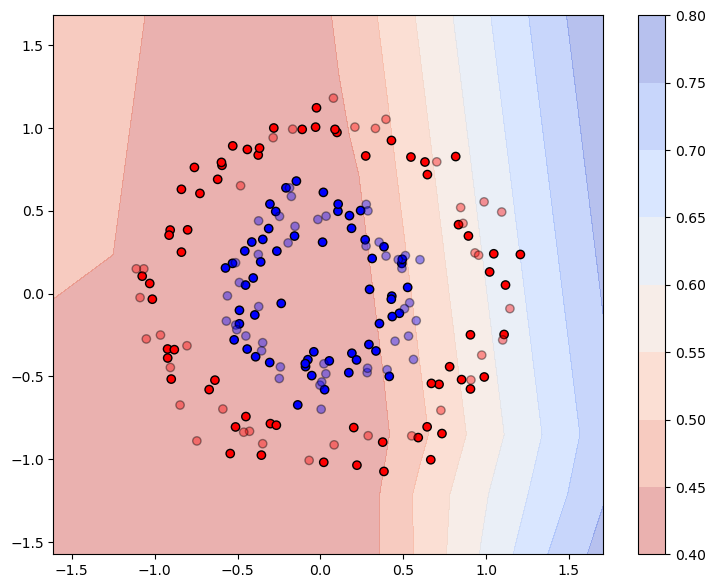

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

xv = np.linspace(x_min, x_max, 10)
yv = np.linspace(y_min, y_max, 10)
Xv, Yv = np.meshgrid(xv, yv)
XYpairs = np.vstack([ Xv.reshape(-1), Yv.reshape(-1)])
zv = nn.predict(XYpairs.T)
Zv = zv.reshape(Xv.shape)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
ax.set_aspect(1)
cn = ax.contourf(Xv, Yv, Zv, cmap="coolwarm_r", alpha=0.4)

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4, edgecolors="k")

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
# ax.set_xticks(())
# ax.set_yticks(())

fig.colorbar(cn)
